In [88]:
# dice research  倍投策略 进行100次倍投，本金都是100，会发生什么？
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# 玩多少把收手
playCount = 100
# 初始本金
originTotal = 100
# 胜率因子 (这里简单的设置为就压小,投注范围是1-100,结果小于coreValue值即获胜)
coreValue = 40
# 赔率
rate = 100 / coreValue
# 模拟总次数
totalSimCount = 1000

# x是一个人的连续下注记录
x = [num for num in range(playCount)]
# y是一个人他
y = [0 for num in x]
z = [0 for num in range(totalSimCount)]

for i in range(0,len(z)):
    currentTotal = originTotal
    currentBet = 1
    for n in range(0,len(x)):
        # 当单次下注超过了现在的剩余本金全部的时候，重新从1开始下注
        if currentBet > currentTotal:
            currentBet = 1
            # 记录当前的本金并重新从1开始投注
            y[n]= currentTotal
            continue
        # 下注的时候要先减掉投注的钱
        currentTotal = currentTotal - currentBet
        # dice 结果随机1-100
        diceResult = random.randint(1,100)

        if (diceResult < coreValue):
            # 获利计算到总收入中
            currentTotal += currentBet * rate
            # 根据倍投策略，获利就应该重置了
            currentBet = 1
        else :
            # 根据倍投策略，输了要将下注金额翻倍
            currentBet += currentBet
        y[n] = currentTotal
    z[i] = y[-1]
                 
print("单轮投入本金:" + str(originTotal))
print("玩多少把就收手:" + str(playCount))
print("投注规则: <" + str(coreValue))
print("赔率:" + str(rate))


print("参与的本金资金额剩余总量: " + str(sum(z)))
average = sum(z) / len(z)
print("本金均值: " + str(average))
hostLose = (sum(z) / len(z)) > originTotal
print("赌场(庄家)赢了吗: " + "庄家赔了" if hostLose else "庄家赢了")


# 庄家赔了
if (hostLose): 
    print("玩家总共赚了多少:" + str(sum(z) - originTotal * totalSimCount))
    print("平均每人赚了多少钱:" + str(average - originTotal))
    print("人均盈亏:" + str((average - originTotal) / originTotal * 100) + "%")
# 庄家赚了
else: 
    print("庄家总共赚了多少:" + str(originTotal * totalSimCount - sum(z)))
    print("平均每人赔了多少钱:" + str(originTotal - average))
    print("玩家人均盈亏:" + str((average-originTotal) / originTotal * 100) + "%")
    
    
# 有多少人最终是赚了的(不管赚了多少)
winCount = 0
for i in range(0,len(z)):
    if (z[i]> originTotal):
        winCount += 1
    
winRate = (winCount / totalSimCount) * 100   
print("参与游戏的总人数(模拟总次数):" + str(totalSimCount))
print("自己在赢钱的人数:" + str(winCount))
print("赢钱的人占总人数的比例: " + str(winRate) + "%")



单轮投入本金:100
玩多少把就收手:100
投注规则: <40
赔率:2.5
参与的本金资金额剩余总量: 89795.0
本金均值: 89.795
庄家赢了
庄家总共赚了多少:10205.0
平均每人赔了多少钱:10.204999999999998
玩家人均盈亏:-10.204999999999998%
参与游戏的总人数(模拟总次数):1000
自己在赢钱的人数:368
赢钱的人占总人数的比例: 36.8%


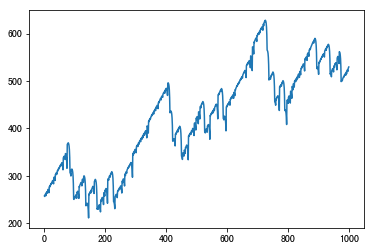

In [178]:
# dice research  倍投策略 本金变化曲线图表
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

x = [num for num in range(1000)]
y = [0 for num in x]

total = 256
currentBet = 1

coreValue = 40
rate = (100/(coreValue-1))

for n in x:
    if currentBet > total:
        currentBet = 1
        y[n]= total
        continue;
    limit = 64
    if ((total - 256) > limit):
        limit = min((total - 256) / 2,64)
    if (currentBet >= limit):
        currentBet = 1
    total = total - currentBet
    diceResult = random.randint(1,100)

    if (diceResult < coreValue):
        total += currentBet * rate
        currentBet = 1
    else :
        currentBet += currentBet
    y[n] = total

plt.plot(x, y)
plt.show()
plt.close()
# close the figure at the end, so we don't get a duplicate
# of the last plot